,x,y,YKR_ID,geometry
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,pt_r_d,pt_m_t,pt_m_tt,pt_m_d
0,5785640,5975373,456,31918,49,31947,44,31985,110,137,32758,118,149,32758
1,5785641,5975373,419,29302,49,32158,44,32196,113,134,32964,121,147,32964
2,5785642,5975373,420,29381,57,31560,51,29821,115,134,33082,123,148,33082
3,5785643,5975373,424,29674,60,34116,55,32377,119,144,33375,127,152,33375
4,5787544,5975373,449,31429,48,31522,43,31559,103,121,32269,111,128,32269


Index(['from_id', 'to_id', 'walk_t', 'walk_d', 'car_r_t', 'car_r_d', 'car_m_t',
       'car_m_d', 'pt_r_t', 'pt_r_tt', 'pt_r_d', 'pt_m_t', 'pt_m_tt',
       'pt_m_d'],
      dtype='object')

from_id    int64
to_id      int64
walk_t     int64
walk_d     int64
car_r_t    int64
car_r_d    int64
car_m_t    int64
car_m_d    int64
pt_r_t     int64
pt_r_tt    int64
pt_r_d     int64
pt_m_t     int64
pt_m_tt    int64
pt_m_d     int64
dtype: object

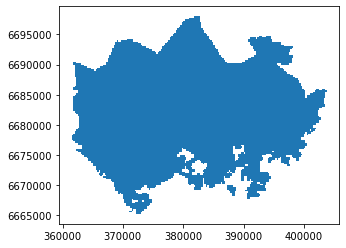

In [1]:
import gdal
import geopandas as gpd
import matplotlib.pyplot as plt
import os

import pandas as pd
import numpy as np

%matplotlib inline

# load the MetropAccess shapefile with geopandas

# File path
fp = "MetropAccess_YKR_grid_EurefFIN.shp"

df_grid = gpd.read_file(fp)

display(df_grid.head())

# travel_times_to_[XXXXXXX]_[NAME-OF-THE-CENTER].txt
fp_2 = "TravelTimes_to_5975373_Forum.txt"

df_tt = pd.read_csv(fp_2, sep=";")

display(df_tt.head())

display(df_tt.columns)
display(df_tt.dtypes)

df_grid.plot()

Index(['x', 'y', 'YKR_ID', 'geometry', 'pt_r_tt', 'car_r_t', 'from_id',
       'to_id'],
      dtype='object')

x            float64
y            float64
YKR_ID         int64
geometry    geometry
pt_r_tt        int64
car_r_t        int64
from_id        int64
to_id          int64
dtype: object

,x,y,YKR_ID,geometry,pt_r_tt,car_r_t,from_id,to_id
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",137,49,5785640,5975373
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",134,49,5785641,5975373
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",134,57,5785642,5975373
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",144,60,5785643,5975373
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",121,48,5787544,5975373


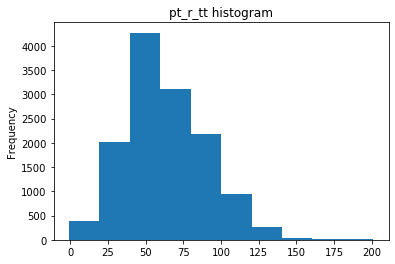

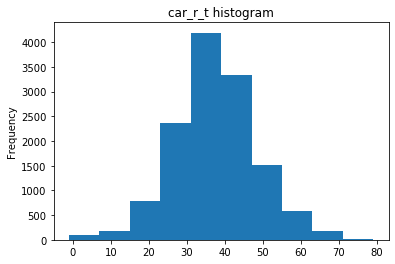

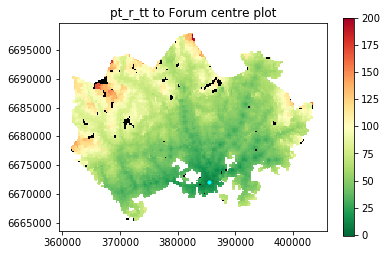

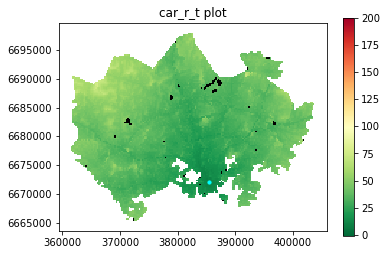

In [2]:
selected_tt = ['pt_r_tt', 'car_r_t', 'from_id', 'to_id']
#        pt_r_tt: travel mode Public tranport
#        car_r_t: travel mode private car
#        from_id: travel start from (refering to a YKR_ID grid “coordinate”)
#        to_id: travel destination (the YKR_ID frid coordinate of the shopping centre), that’s why it is staying the same per shopping centre file

selected_cols = ['ID','Remark','Shape_Area','CLC_CODE','LABEL3','RGB','geometry']

# Select data
df_tt = df_tt[selected_tt]

# What are the columns now?


# join/merge the shopping centre dataframe with the Metro grid dataframe based on the ID / YKR_ID column
data = df_grid.merge(df_tt, how='inner', left_on='YKR_ID', right_on='from_id', suffixes=('_grid', '_times'))

display(data.columns)
display(data.dtypes)

display(data.head())


fig, ax = plt.subplots()
data['pt_r_tt'].plot.hist(bins=10);
plt.title("pt_r_tt histogram")
plt.show()

fig, ax = plt.subplots()
data['car_r_t'].plot.hist(bins=10);
plt.title("car_r_t histogram")
plt.show()

fig, ax = plt.subplots()
data.plot(ax=ax, column='pt_r_tt', legend=True, vmax=200, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=10, color='cyan')
data.loc[data['pt_r_tt'] < 0].plot(ax=ax, color='black')
plt.title("pt_r_tt to Forum centre plot")
plt.show()

fig, ax = plt.subplots()
data.plot(ax=ax, column='car_r_t', legend=True, vmax=200, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=10, color='cyan')
data.loc[data['car_r_t'] < 0].plot(ax=ax, color='black')
plt.title("car_r_t plot")
plt.show()


C:\dev\conda3\envs\geopy2019\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\dev\conda3\envs\geopy2019\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


{'Class 0: -1 - 30': 'white', 'Class 1: 31 - 52': 'white', 'Class 2: 53 - 74': 'white', 'Class 3: 75 - 101': 'white', 'Class 4: 102 - 201': 'white'}


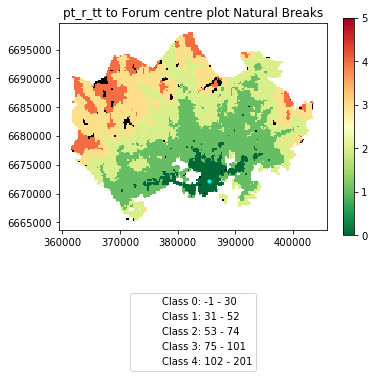

{'Class 0: -1 - 20': 'white', 'Class 1: 21 - 31': 'white', 'Class 2: 32 - 40': 'white', 'Class 3: 41 - 50': 'white', 'Class 4: 51 - 79': 'white'}


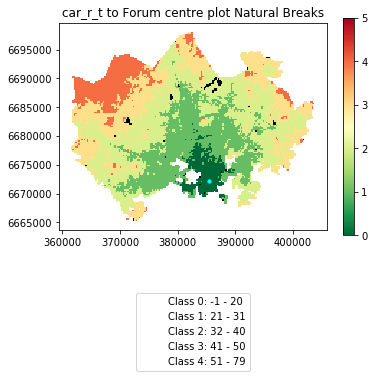

In [3]:
# create a classifier (custom or common one) based on the materials that we went through in the lesson materials
import pysal.viz.mapclassify as mc
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt  

# You need to classify the data into a new column in your GeoDataFrame. For classification, you can either:

#        Use the common classifiers from pysal
#        OR create your own custom classifiers from pysal. If you create your own, remember to document it well how it works! Write a general description of it and comment your code as well.

# Visualize the classified travel times (Public transport AND Car) of the shopping centre with appropriate plots.
def prepareLegendPatch(df_name, data_column, class_column):
    grouped = df_name.groupby(class_column)

    # legend_dict = { 'class from to' : 'white'}
    legend_dict = {}

    for cla, datas in grouped:
        minv = datas[data_column].min()
        maxv = datas[data_column].max()
        legend_dict["Class {}: {} - {}".format(cla, minv, maxv)] = "white"

    print(legend_dict)  

    patchList = []
    for key in legend_dict:
            data_key = mpatches.Patch(color=legend_dict[key], label=key)
            patchList.append(data_key)
    return patchList


# NAtural Breaks for Car and Public Transport
n_classes = 5
classifier_nb = mc.NaturalBreaks.make(k=n_classes)

data['pt_r_tt_nb'] = data[['pt_r_tt']].apply(classifier_nb)
data['car_r_t_nb'] = data[['car_r_t']].apply(classifier_nb)
data.head(5)

fig, ax = plt.subplots()
data.plot(ax=ax, column='pt_r_tt_nb', legend=True, vmax=n_classes, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=10, color='cyan')
data.loc[data['pt_r_tt'] < 0].plot(ax=ax, color='black')
plt.title("pt_r_tt to Forum centre plot Natural Breaks")

legend = prepareLegendPatch(data, 'pt_r_tt', 'pt_r_tt_nb')
plt.legend(handles=legend, loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=1)
plt.show()

fig, ax = plt.subplots()
data.plot(ax=ax, column='car_r_t_nb', legend=True, vmax=n_classes, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=10, color='cyan')
data.loc[data['car_r_t'] < 0].plot(ax=ax, color='black')
plt.title("car_r_t to Forum centre plot Natural Breaks")

legend = prepareLegendPatch(data, 'car_r_t', 'car_r_t_nb')
plt.legend(handles=legend, loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=1)
plt.show()

{'Class 0: -1 - 39': 'white', 'Class 1: 40 - 79': 'white', 'Class 2: 80 - 120': 'white', 'Class 3: 121 - 158': 'white', 'Class 4: 163 - 201': 'white'}


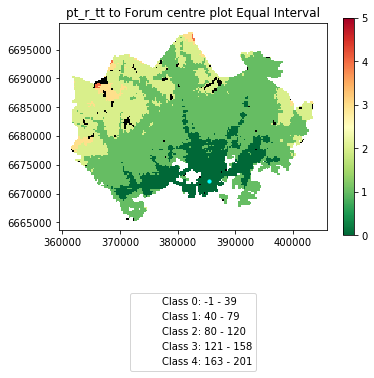

{'Class 0: -1 - 15': 'white', 'Class 1: 16 - 31': 'white', 'Class 2: 32 - 47': 'white', 'Class 3: 48 - 63': 'white', 'Class 4: 64 - 79': 'white'}


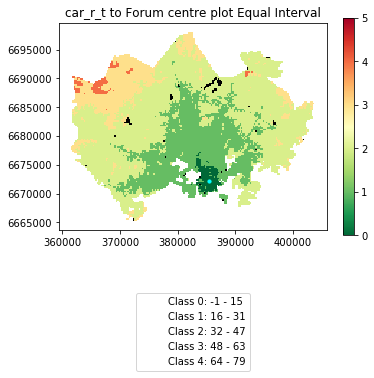

In [4]:
# Equal_Intervalfor Car and Public Transport
n_classes = 5
classifier_eq_intv = mc.EqualInterval.make(k=n_classes)

data['pt_r_tt_eq'] = data[['pt_r_tt']].apply(classifier_eq_intv)
data['car_r_t_eq'] = data[['car_r_t']].apply(classifier_eq_intv)
data.head(5)

fig, ax = plt.subplots()
data.plot(ax=ax, column='pt_r_tt_eq', legend=True, vmax=n_classes, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=10, color='cyan')
data.loc[data['pt_r_tt'] < 0].plot(ax=ax, color='black')
plt.title("pt_r_tt to Forum centre plot Equal Interval")

legend = prepareLegendPatch(data, 'pt_r_tt', 'pt_r_tt_eq')
plt.legend(handles=legend, loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=1)
plt.show()

fig, ax = plt.subplots()
data.plot(ax=ax, column='car_r_t_eq', legend=True, vmax=n_classes, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=10, color='cyan')
data.loc[data['car_r_t'] < 0].plot(ax=ax, color='black')
plt.title("car_r_t to Forum centre plot Equal Interval")

legend = prepareLegendPatch(data, 'car_r_t', 'car_r_t_eq')
plt.legend(handles=legend, loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=1)
plt.show()

{'Class 0: -1 - 41': 'white', 'Class 1: 42 - 53': 'white', 'Class 2: 54 - 66': 'white', 'Class 3: 67 - 85': 'white', 'Class 4: 86 - 201': 'white'}


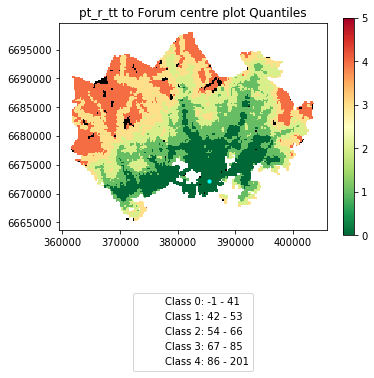

{'Class 0: -1 - 29': 'white', 'Class 1: 30 - 34': 'white', 'Class 2: 35 - 39': 'white', 'Class 3: 40 - 45': 'white', 'Class 4: 46 - 79': 'white'}


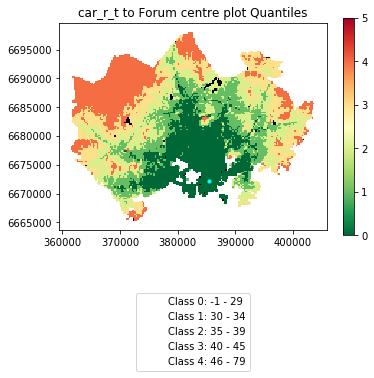

In [5]:
# Equal_Intervalfor Car and Public Transport
n_classes = 5
classifier_quantiles = mc.Quantiles.make(k=n_classes)

data['pt_r_tt_qa'] = data[['pt_r_tt']].apply(classifier_quantiles)
data['car_r_t_qa'] = data[['car_r_t']].apply(classifier_quantiles)
data.head(5)

fig, ax = plt.subplots()
data.plot(ax=ax, column='pt_r_tt_qa', legend=True, vmax=n_classes, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=10, color='cyan')
data.loc[data['pt_r_tt'] < 0].plot(ax=ax, color='black')
plt.title("pt_r_tt to Forum centre plot Quantiles")

legend = prepareLegendPatch(data, 'pt_r_tt', 'pt_r_tt_qa')
plt.legend(handles=legend, loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=1)
plt.show()

fig, ax = plt.subplots()
data.plot(ax=ax, column='car_r_t_qa', legend=True, vmax=n_classes, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=10, color='cyan')
data.loc[data['car_r_t'] < 0].plot(ax=ax, color='black')
plt.title("car_r_t to Forum centre plot Quantiles")

legend = prepareLegendPatch(data, 'car_r_t', 'car_r_t_qa')
plt.legend(handles=legend, loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=1)
plt.show()

{'Class 0: -1 - 9': 'white', 'Class 1: 10 - 36': 'white', 'Class 2: 37 - 89': 'white', 'Class 3: 90 - 116': 'white', 'Class 4: 117 - 201': 'white'}


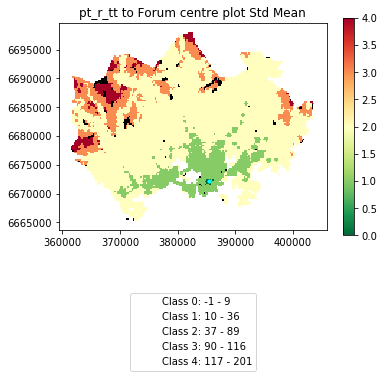

{'Class 0: -1 - 15': 'white', 'Class 1: 16 - 26': 'white', 'Class 2: 27 - 47': 'white', 'Class 3: 48 - 58': 'white', 'Class 4: 59 - 79': 'white'}


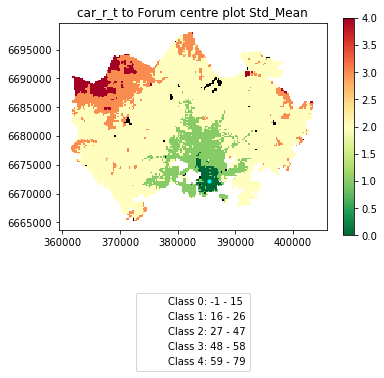

In [6]:

# Equal_Intervalfor Car and Public Transport
classifier_std_mean = mc.StdMean.make()

data['pt_r_tt_std'] = data[['pt_r_tt']].apply(classifier_std_mean)
data['car_r_t_std'] = data[['car_r_t']].apply(classifier_std_mean)
data.head(5)

fig, ax = plt.subplots()
data.plot(ax=ax, column='pt_r_tt_std', legend=True, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=10, color='cyan')
data.loc[data['pt_r_tt'] < 0].plot(ax=ax, color='black')
plt.title("pt_r_tt to Forum centre plot Std Mean")

legend = prepareLegendPatch(data, 'pt_r_tt', 'pt_r_tt_std')
plt.legend(handles=legend, loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=1)
plt.show()

fig, ax = plt.subplots()
data.plot(ax=ax, column='car_r_t_std', legend=True, cmap='RdYlGn_r')
data.loc[data['YKR_ID'] == 5975373].centroid.plot(ax=ax, markersize=10, color='cyan')
data.loc[data['car_r_t'] < 0].plot(ax=ax, color='black')
plt.title("car_r_t to Forum centre plot Std_Mean")

legend = prepareLegendPatch(data, 'car_r_t', 'car_r_t_std')
plt.legend(handles=legend, loc='lower center', bbox_to_anchor=(0.5, -0.7), ncol=1)
plt.show()